In [1]:
# Import Lybraries
import numpy as np
import pandas as pd
from pylab import plt, mpl
import statsmodels as st
import statsmodels.regression.linear_model as lm
import statsmodels.api as sm
import statsmodels.tools.tools as ct
import matplotlib.pyplot as ptl
import matplotlib.mlab as mlab

In [2]:
# Companies Ticker & Name Selection

Tickers = ['GD', 
'LNC', 
'TXT',
'TAP',
'DDS', 
'C', 
'CI', 
'CVX', 
'ECL', 
'FMC', 
'GPC',
'HAL',
'HAS',
'HD',
'JPM',
'KMB',
'LHX',
'LLY',
'LOW',
'MMM',
'CLX',
'IP',
'NWL',
'BAX',
'PCAR',
'VFC',
'WHR',
'AON',
'PG',
'HSY'
]

T_names = ['General Dynamics Corporation',
'Lincoln National Corporation', 
'Textron Inc.', 
'Molson Coors Beverage Company', 
'Dillards Inc', 
'Citigroup, Inc.', 
'Cigna Corporation', 
'Chevron Corporation', 
'Ecolab Inc.', 
'FMC Corporation', 
'Genuine Parts Company',
'Halliburton Company',
'Hasbro, Inc.',
'Home Depot, Inc.',
'JP Morgan Chase & Co.',
'Kimberly-Clark Corporation',
'L3Harris Technologies, Inc.',
'Eli Lilly and Company',
'Lowe’s Companies, Inc.',
'3M Company',
'Clorox Company',
'International Paper Company',
'Newell Brands Inc.',
'Baxter International Inc.',
'PACCAR Inc.',
'V.F. Corporation',
'Whirlpool Corporation',
'Aon, PLC',
'Procter & Gamble Company',
'Hershey Co.'
]


In [3]:
for ric, name in zip(Tickers, T_names):
    print('{:6s} | {}'.format(ric, name))

GD     | General Dynamics Corporation
LNC    | Lincoln National Corporation
TXT    | Textron Inc.
TAP    | Molson Coors Beverage Company
DDS    | Dillards Inc
C      | Citigroup, Inc.
CI     | Cigna Corporation
CVX    | Chevron Corporation
ECL    | Ecolab Inc.
FMC    | FMC Corporation
GPC    | Genuine Parts Company
HAL    | Halliburton Company
HAS    | Hasbro, Inc.
HD     | Home Depot, Inc.
JPM    | JP Morgan Chase & Co.
KMB    | Kimberly-Clark Corporation
LHX    | L3Harris Technologies, Inc.
LLY    | Eli Lilly and Company
LOW    | Lowe’s Companies, Inc.
MMM    | 3M Company
CLX    | Clorox Company
IP     | International Paper Company
NWL    | Newell Brands Inc.
BAX    | Baxter International Inc.
PCAR   | PACCAR Inc.
VFC    | V.F. Corporation
WHR    | Whirlpool Corporation
AON    | Aon, PLC
PG     | Procter & Gamble Company
HSY    | Hershey Co.


In [4]:
# Read prices csv file
prices = pd.read_excel('data_30stocks.xlsx')
prices['Date'] = pd.to_datetime(prices['Date'])
prices.set_index('Date')

,GD,LNC,TXT,TAP,DDS,C,CI,CVX,ECL,FMC,...,CLX,IP,NWL,BAX,PCAR,VFC,WHR,AON,PG,HSY
Date,,,,,,,,,,,,,,,,,,,,,
1990-01-12,5.203,14.0625,5.6875,10.2500,23.5417,21.6203,6.1806,16.0625,3.5938,4.3714,...,10.000,24.6792,10.9375,5.8277,3.4783,3.7062,31.500,11.6296,8.4688,8.4688
1990-01-15,5.172,14.1875,5.7188,10.3125,22.8333,21.5237,6.0556,16.1250,3.3438,4.2840,...,10.000,24.4458,10.3750,5.8277,3.3924,3.7356,31.750,11.7037,8.5000,8.4063
1990-01-16,5.188,14.3750,5.8438,10.0625,23.2917,21.4272,6.0000,16.4688,3.3594,4.3714,...,9.969,24.5042,10.8125,5.8277,3.5427,3.7650,31.625,11.8148,8.6094,8.4375
1990-01-17,5.141,14.3750,5.8125,10.0000,23.1250,22.0063,5.8472,16.3750,3.3125,4.3277,...,10.000,24.3291,10.5625,5.8277,3.5641,3.6473,30.750,11.5556,8.5625,8.3438
1990-01-18,5.172,14.6875,5.9063,9.6250,22.8750,22.2959,5.9306,16.5000,3.3594,4.3277,...,10.063,24.2124,11.0625,5.8881,3.5427,3.7062,30.875,11.4444,8.6875,8.3750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-06,248.280,37.3500,73.5700,53.2600,357.2800,44.9800,329.6400,172.0100,148.4300,127.9400,...,146.950,36.4200,12.7650,51.5100,103.6700,29.3900,141.860,307.9600,149.2800,232.5600
2022-12-07,246.210,35.2800,72.5700,53.0500,358.0500,44.6700,332.1900,172.5200,147.9700,127.9200,...,149.320,36.1500,12.8100,52.3500,104.4900,28.9700,142.760,304.1400,150.2400,236.6900
2022-12-08,247.680,31.4500,73.0000,52.6600,352.3200,44.6900,333.5000,173.5400,149.1700,127.9900,...,150.210,36.1700,13.3050,52.6200,103.6100,28.6700,145.360,306.5700,151.3200,241.3100


In [5]:
#Replacing the null values for the last valid observation, in order to obtain the last price when the end of the month was on a weekend/holiday
prices = prices.fillna(method='ffill')

#Retrieving the Monthly data of the prices
prices = prices.loc[prices.groupby(pd.Grouper(key='Date', freq='1M')).Date.idxmax()]
prices

,Date,GD,LNC,TXT,TAP,DDS,C,CI,CVX,ECL,...,CLX,IP,NWL,BAX,PCAR,VFC,WHR,AON,PG,HSY
13,1990-01-31,5.078,13.6875,5.3750,9.2500,21.7083,20.1725,5.4861,16.7500,3.1563,...,9.688,23.5707,11.6250,5.7371,3.2850,3.7503,30.500,11.0000,8.0000,7.9688
32,1990-02-28,4.688,13.2500,5.7813,9.1875,21.8333,20.7516,5.6528,16.7813,3.0625,...,9.594,23.3373,11.3750,6.0089,3.6715,3.6032,31.750,11.0741,8.0000,7.2500
54,1990-03-30,4.688,13.8750,5.6563,9.0625,24.4583,21.2342,5.6250,16.8750,3.0000,...,9.938,23.5707,12.3125,5.8579,3.8540,3.6620,30.625,11.1111,8.4688,7.9375
74,1990-04-30,4.344,13.1250,6.0000,11.5625,23.9167,22.1994,5.1111,16.4688,2.7188,...,9.531,23.1623,13.0000,5.0426,3.3709,3.5591,28.125,10.3333,8.8281,8.0625
96,1990-05-31,4.438,13.6875,6.1250,12.8125,30.6250,25.1915,5.7778,17.5000,3.1094,...,10.625,24.5042,14.6250,5.6767,3.5641,3.5444,29.750,11.6296,10.3281,8.7500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8312,2022-08-31,228.930,46.0600,62.3800,51.6700,296.2400,48.8100,283.4500,158.0600,163.8300,...,144.340,41.6200,17.8300,57.4600,87.5100,41.4500,156.600,279.2600,137.9400,224.6700
8333,2022-09-30,212.170,43.9100,58.2600,47.9900,272.7600,41.6700,277.4700,143.6700,144.4200,...,128.390,31.7000,13.8800,53.8600,83.6900,29.9100,134.810,267.8700,126.2500,220.4700
8355,2022-10-31,249.800,53.8700,68.4400,50.4300,328.7900,45.8600,323.0600,180.9000,157.0700,...,146.040,33.6100,13.8050,54.3500,96.8300,28.2500,138.240,281.4900,134.6700,238.7700
8376,2022-11-30,252.390,38.9400,71.3800,55.1100,359.7000,48.4100,328.8900,183.3100,149.8300,...,148.650,37.1200,12.9500,56.5300,105.9100,32.8200,146.530,308.2800,149.1600,235.1700


In [6]:
#Storing the Data column
r_dates = prices['Date']

In [7]:
#Removing the Excess date column
prices = prices.iloc[:,1:31]

<AxesSubplot: xlabel='Date'>

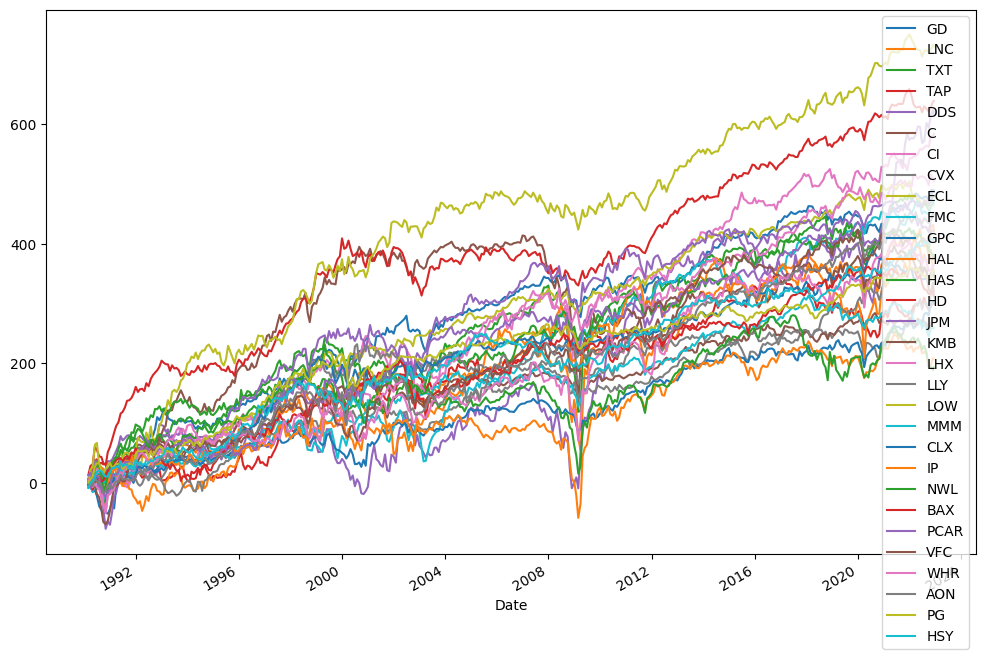

In [8]:
#Price monthly changes from each asset
returns = prices.copy()

names = prices.columns.values
names

for column in prices:
    returns[column] = prices[column].pct_change().round(3)*100

returns = returns.set_index(r_dates)
returns.cumsum().plot(figsize=(12, 8))

In [9]:
#Adding the data Index
prices = prices.set_index(r_dates)

### ***Computing Portfolios based on market capitalization***

**Short-Term**

In [10]:
#Setting the length of the period to anaylise the past returns
PS_st = 6

avg_ret_st = returns.rolling(PS_st).mean()

#Setting Rebalancing period length
REB_st = 12

#Setting the number of portfolios to create and the number of companies in each portfolio
PT = 5
Npt = int(len(Tickers)/PT)


In [11]:
#Generate the empty dictionarys to append all the portfolio
dict_of_ptl_st = {}
dict_of_ptl_st_temp = {}

#Generate the  empty lists for each portfolio inside the portfolio dictionary
#NOTE: Portfolios sorted from the past worst performers to the past best performers, meaning the P1 contain the worst past performing Stocks, while P'PT' contain the best past performing Stocks

for j in range(1,PT+1):
  dict_of_ptl_st['P%s_ptl' % j] = []
  dict_of_ptl_st_temp['P%s_ptl_temp' % j] = []


#Iteration parameter to check the rebalancing period
iter = 1

for i in range(len(avg_ret_st)):
    #Check the rebalance period

      #For values lower than the PS value, add just null values to portfolio
    if (i<(PS_st-1)):
    
      #Append Null value

        for j in range(1,PT+1):

          dict_of_ptl_st['P%s_ptl' % j].append(None)


      #For the first iteration with the moving average of the returns create the first portfolio
    elif (i==(PS_st-1)):

      #Sort the returns average for the iteration i
      sorted_ret = avg_ret_st.iloc[i,:].sort_values().index

      #Create the firsts portfolios
        
      for j in range(1,PT+1):
        temp = list(sorted_ret[(j-1)*Npt:j*Npt])

        dict_of_ptl_st['P%s_ptl' % j].append(list(temp))
  


      #For all the other iteration higher than the PS create a If to diferenciate the periods that need a rebalance of the portfolio or not
    else:

          #Rebalancing the portfolio if iteration parameter equals the REB value
        if (iter == REB_st):
      
          #Sort the returns average for the iteration i
          sorted_ret = avg_ret_st.iloc[i,:].sort_values().index

          #Create a new portfolio
          for j in range(1,PT+1):
              temp = list(sorted_ret[(j-1)*Npt:j*Npt])

              dict_of_ptl_st['P%s_ptl' % j].append(list(temp))

          iter = 1

          #Append the previous portfolio for all the others iteration that don't correspond to rebalancing periods
        else:

          #Append last created portfolio
          for j in range(1,PT+1):
              dict_of_ptl_st['P%s_ptl' % j].append(dict_of_ptl_st['P%s_ptl' % j][i-1])


          iter = iter +1 


In [12]:
portfolio_st = pd.DataFrame.from_dict(dict_of_ptl_st)
portfolio_st = portfolio_st.set_index(prices.index)
portfolio_st

,P1_ptl,P2_ptl,P3_ptl,P4_ptl,P5_ptl
Date,,,,,
1990-01-31,None,None,None,None,None
1990-02-28,None,None,None,None,None
1990-03-30,None,None,None,None,None
1990-04-30,None,None,None,None,None
1990-05-31,None,None,None,None,None
...,...,...,...,...,...
2022-08-31,"[VFC, ECL, HD, WHR, LOW, LNC]","[JPM, MMM, BAX, C, TXT, CLX]","[HAS, PG, NWL, IP, AON, PCAR]","[DDS, GPC, KMB, FMC, GD, HSY]","[CI, LHX, TAP, LLY, CVX, HAL]"
2022-09-30,"[VFC, ECL, HD, WHR, LOW, LNC]","[JPM, MMM, BAX, C, TXT, CLX]","[HAS, PG, NWL, IP, AON, PCAR]","[DDS, GPC, KMB, FMC, GD, HSY]","[CI, LHX, TAP, LLY, CVX, HAL]"
2022-10-31,"[VFC, ECL, HD, WHR, LOW, LNC]","[JPM, MMM, BAX, C, TXT, CLX]","[HAS, PG, NWL, IP, AON, PCAR]","[DDS, GPC, KMB, FMC, GD, HSY]","[CI, LHX, TAP, LLY, CVX, HAL]"


**Long-Term**

In [13]:
#Setting the length of the period to anaylise the past returns
PS_lt = 24

avg_ret_lt = returns.rolling(PS_lt).mean()

#Setting Rebalancing period length
REB_lt = 36

#Setting the number of portfolios to create and the number of companies in each portfolio
PT = 5
Npt = int(len(Tickers)/PT)

In [14]:
#Generate the empty dictionarys to append all the portfolio
dict_of_ptl_lt = {}
dict_of_ptl_lt_temp = {}

#Generate the  empty lists for each portfolio inside the portfolio dictionary
#NOTE: Portfolios sorted from the past worst performers to the past best performers, meaning the P1 contain the worst past performing Stocks, while P'PT' contain the best past performing Stocks

for j in range(1,PT+1):
  dict_of_ptl_lt['P%s_ptl' % j] = []
  dict_of_ptl_lt_temp['P%s_ptl_temp' % j] = []


#Iteration parameter to check the rebalancing period
iter = 1

for i in range(len(avg_ret_lt)):
    #Check the rebalance period

      #For values lower than the PS value, add just null values to portfolio
    if (i<(PS_lt-1)):
    
      #Append Null value

        for j in range(1,PT+1):

          dict_of_ptl_lt['P%s_ptl' % j].append(None)


      #For the first iteration with the moving average of the returns create the first portfolio
    elif (i==(PS_lt-1)):

      #Sort the returns average for the iteration i
      sorted_ret = avg_ret_lt.iloc[i,:].sort_values().index

      #Create the firsts portfolios
        
      for j in range(1,PT+1):
        temp = list(sorted_ret[(j-1)*Npt:j*Npt])

        dict_of_ptl_lt['P%s_ptl' % j].append(list(temp))
  


      #For all the other iteration higher than the PS create a If to diferenciate the periods that need a rebalance of the portfolio or not
    else:

          #Rebalancing the portfolio if iteration parameter equals the REB value
        if (iter == REB_lt):
      
          #Sort the returns average for the iteration i
          sorted_ret = avg_ret_lt.iloc[i,:].sort_values().index

          #Create a new portfolio
          for j in range(1,PT+1):
              temp = list(sorted_ret[(j-1)*Npt:j*Npt])

              dict_of_ptl_lt['P%s_ptl' % j].append(list(temp))

          iter = 1

          #Append the previous portfolio for all the others iteration that don't correspond to rebalancing periods
        else:

          #Append last created portfolio
          for j in range(1,PT+1):
              dict_of_ptl_lt['P%s_ptl' % j].append(dict_of_ptl_lt['P%s_ptl' % j][i-1])


          iter = iter +1 


In [15]:
portfolio_lt = pd.DataFrame.from_dict(dict_of_ptl_lt)
portfolio_lt = portfolio_lt.set_index(prices.index)
portfolio_lt

,P1_ptl,P2_ptl,P3_ptl,P4_ptl,P5_ptl
Date,,,,,
1990-01-31,None,None,None,None,None
1990-02-28,None,None,None,None,None
1990-03-30,None,None,None,None,None
1990-04-30,None,None,None,None,None
1990-05-31,None,None,None,None,None
...,...,...,...,...,...
2022-08-31,"[VFC, C, TAP, HAS, MMM, BAX]","[KMB, CVX, IP, LHX, FMC, PCAR]","[CLX, CI, JPM, GD, NWL, ECL]","[PG, HSY, GPC, AON, LNC, HAL]","[WHR, HD, TXT, LLY, LOW, DDS]"
2022-09-30,"[VFC, C, TAP, HAS, MMM, BAX]","[KMB, CVX, IP, LHX, FMC, PCAR]","[CLX, CI, JPM, GD, NWL, ECL]","[PG, HSY, GPC, AON, LNC, HAL]","[WHR, HD, TXT, LLY, LOW, DDS]"
2022-10-31,"[VFC, C, TAP, HAS, MMM, BAX]","[KMB, CVX, IP, LHX, FMC, PCAR]","[CLX, CI, JPM, GD, NWL, ECL]","[PG, HSY, GPC, AON, LNC, HAL]","[WHR, HD, TXT, LLY, LOW, DDS]"


## ***Calculate returns of the portfolios***

**Short-term**

In [16]:
#Generate the empty dictionarys to append all retuns of the portfolios
dict_of_ret_ptl_st = {}


#Generate the  empty lists for each portfolio inside the portfolio dictionary
#NOTE: Portfolios sorted from the past best performers to the past worst performers, meaning the P1 contain the worst past performing Stocks, while P'PT' contain the best past performing Stocks

for j in range(1,PT+1):
  dict_of_ret_ptl_st['P%s_ptl' % j] = []


#Crating the first portfolio returns
start_index = 0
a=0

for i in portfolio_st.iloc[0:-1,0]:
          if i is None:
            #print('is_null')
            a = 0

          else:
            for x in i:
              # print(avg_mc.columns.get_loc(j))
              b_comp_index = returns.columns.get_loc(x)
              # print(avg_mc.iloc[start_index,s_comp_index])
              a += returns.iloc[start_index,b_comp_index]
          b = a/Npt
          a = 0
          dict_of_ret_ptl_st['P1_ptl'].append(b)
          start_index += 1


In [17]:
#Crating the Second portfolio returns
start_index = 0
a=0

for i in portfolio_st.iloc[0:-1,1]:
          if i is None:
            #print('is_null')
            a = 0

          else:
            for x in i:
              # print(avg_mc.columns.get_loc(j))
              b_comp_index = returns.columns.get_loc(x)
              # print(avg_mc.iloc[start_index,s_comp_index])
              a += returns.iloc[start_index,b_comp_index]
          b = a/Npt
          a = 0
          dict_of_ret_ptl_st['P2_ptl'].append(b)
          start_index += 1

In [18]:
#Crating the third portfolio returns
start_index = 0
a=0

for i in portfolio_st.iloc[0:-1,2]:
          if i is None:
            #print('is_null')
            a = 0

          else:
            for x in i:
              # print(avg_mc.columns.get_loc(j))
              b_comp_index = returns.columns.get_loc(x)
              # print(avg_mc.iloc[start_index,s_comp_index])
              a += returns.iloc[start_index,b_comp_index]
          b = a/Npt
          a = 0
          dict_of_ret_ptl_st['P3_ptl'].append(b)
          start_index += 1

In [19]:
#Crating the fourth portfolio returns
start_index = 0
a=0

for i in portfolio_st.iloc[0:-1,3]:
          if i is None:
            #print('is_null')
            a = 0

          else:
            for x in i:
              # print(avg_mc.columns.get_loc(j))
              b_comp_index = returns.columns.get_loc(x)
              # print(avg_mc.iloc[start_index,s_comp_index])
              a += returns.iloc[start_index,b_comp_index]
          b = a/Npt
          a = 0
          dict_of_ret_ptl_st['P4_ptl'].append(b)
          start_index += 1

In [20]:
#Crating the fifth portfolio returns
start_index = 0
a=0

for i in portfolio_st.iloc[0:-1,4]:
          if i is None:
            #print('is_null')
            a = 0

          else:
            for x in i:
              # print(avg_mc.columns.get_loc(j))
              b_comp_index = returns.columns.get_loc(x)
              # print(avg_mc.iloc[start_index,s_comp_index])
              a += returns.iloc[start_index,b_comp_index]
          b = a/Npt
          a = 0
          dict_of_ret_ptl_st['P5_ptl'].append(b)
          start_index += 1

In [21]:
portfolio_ret_st = pd.DataFrame.from_dict(dict_of_ret_ptl_st)
portfolio_ret_st = portfolio_ret_st.set_index(prices.index[0:-1])

<AxesSubplot: xlabel='Date'>

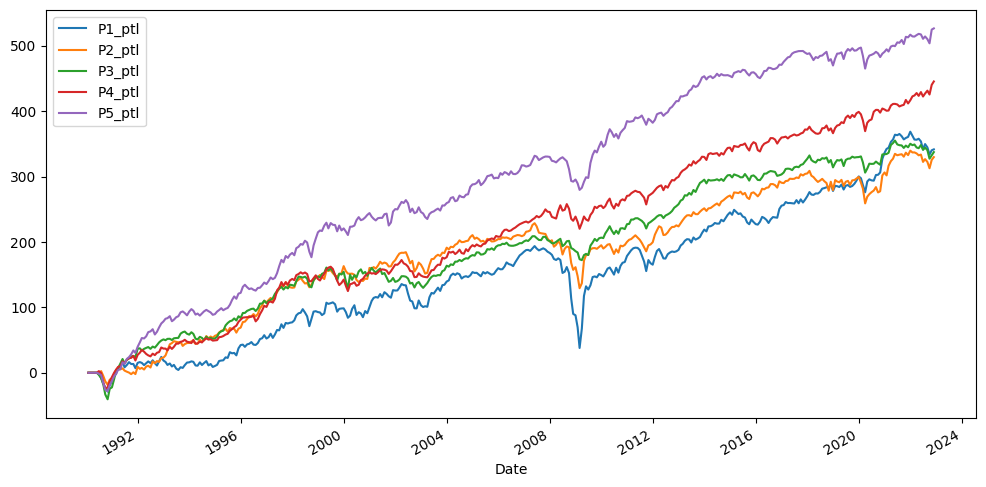

In [22]:
portfolio_ret_st.cumsum().plot(figsize=(12,6))

**Long-term**

In [23]:
#Generate the empty dictionarys to append all retuns of the portfolios
dict_of_ret_ptl_lt = {}


#Generate the  empty lists for each portfolio inside the portfolio dictionary
#NOTE: Portfolios sorted from the past best performers to the past worst performers, meaning the P1 contain the worst past performing Stocks, while P'PT' contain the best past performing Stocks

for j in range(1,PT+1):
  dict_of_ret_ptl_lt['P%s_ptl' % j] = []


#Crating the first portfolio returns
start_index = 0
a=0

for i in portfolio_lt.iloc[0:-1,0]:
          if i is None:
            #print('is_null')
            a = 0

          else:
            for x in i:
              # print(avg_mc.columns.get_loc(j))
              b_comp_index = returns.columns.get_loc(x)
              # print(avg_mc.iloc[start_index,s_comp_index])
              a += returns.iloc[start_index,b_comp_index]
          b = a/Npt
          a = 0
          dict_of_ret_ptl_lt['P1_ptl'].append(b)
          start_index += 1


In [24]:
#Crating the Second portfolio returns
start_index = 0
a=0

for i in portfolio_lt.iloc[0:-1,1]:
          if i is None:
            #print('is_null')
            a = 0

          else:
            for x in i:
              # print(avg_mc.columns.get_loc(j))
              b_comp_index = returns.columns.get_loc(x)
              # print(avg_mc.iloc[start_index,s_comp_index])
              a += returns.iloc[start_index,b_comp_index]
          b = a/Npt
          a = 0
          dict_of_ret_ptl_lt['P2_ptl'].append(b)
          start_index += 1

In [25]:
#Crating the third portfolio returns
start_index = 0
a=0

for i in portfolio_lt.iloc[0:-1,2]:
          if i is None:
            #print('is_null')
            a = 0

          else:
            for x in i:
              # print(avg_mc.columns.get_loc(j))
              b_comp_index = returns.columns.get_loc(x)
              # print(avg_mc.iloc[start_index,s_comp_index])
              a += returns.iloc[start_index,b_comp_index]
          b = a/Npt
          a = 0
          dict_of_ret_ptl_lt['P3_ptl'].append(b)
          start_index += 1

In [26]:
#Crating the fourth portfolio returns
start_index = 0
a=0

for i in portfolio_lt.iloc[0:-1,3]:
          if i is None:
            #print('is_null')
            a = 0

          else:
            for x in i:
              # print(avg_mc.columns.get_loc(j))
              b_comp_index = returns.columns.get_loc(x)
              # print(avg_mc.iloc[start_index,s_comp_index])
              a += returns.iloc[start_index,b_comp_index]
          b = a/Npt
          a = 0
          dict_of_ret_ptl_lt['P4_ptl'].append(b)
          start_index += 1

In [27]:
#Crating the fifth portfolio returns
start_index = 0
a=0

for i in portfolio_lt.iloc[0:-1,4]:
          if i is None:
            #print('is_null')
            a = 0

          else:
            for x in i:
              # print(avg_mc.columns.get_loc(j))
              b_comp_index = returns.columns.get_loc(x)
              # print(avg_mc.iloc[start_index,s_comp_index])
              a += returns.iloc[start_index,b_comp_index]
          b = a/Npt
          a = 0
          dict_of_ret_ptl_lt['P5_ptl'].append(b)
          start_index += 1

In [28]:
portfolio_ret_lt = pd.DataFrame.from_dict(dict_of_ret_ptl_lt)
portfolio_ret_lt = portfolio_ret_lt.set_index(prices.index[0:-1])

<AxesSubplot: xlabel='Date'>

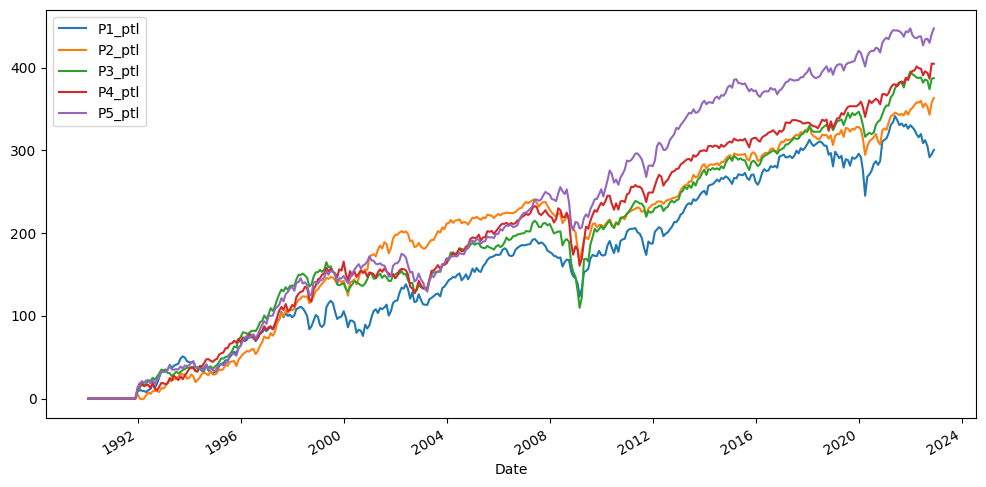

In [29]:
portfolio_ret_lt.cumsum().plot(figsize=(12,6))

In [30]:
#Calculate and ploting the difference or premium betweeen the moving average returns of the P5 (best performers) and P1 (worst performers)
bvw_difference_st = portfolio_ret_st['P5_ptl'].rolling(12).mean() - portfolio_ret_st['P1_ptl'].rolling(12).mean()
bvw_difference_lt = portfolio_ret_lt['P5_ptl'].rolling(36).mean() - portfolio_ret_lt['P1_ptl'].rolling(36).mean()


<AxesSubplot: title={'center': 'Difference Short-Term (PTL5-PTL1)'}, xlabel='Date'>

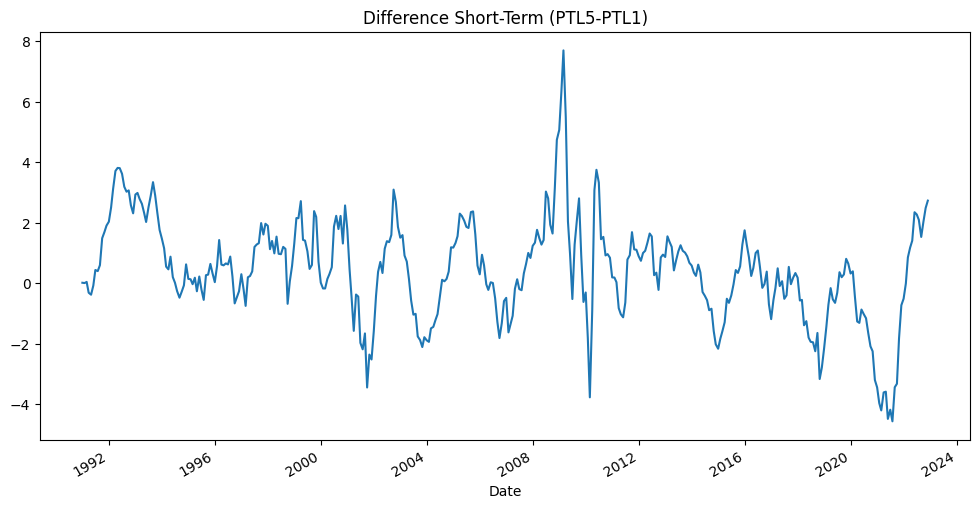

In [31]:
#Plotting the short-term difference
bvw_difference_st.plot(figsize=(12,6), xlabel = 'Date', title = 'Difference Short-Term (PTL5-PTL1)')

<AxesSubplot: title={'center': 'Difference Long-Term (PTL5-PTL1)'}, xlabel='Date'>

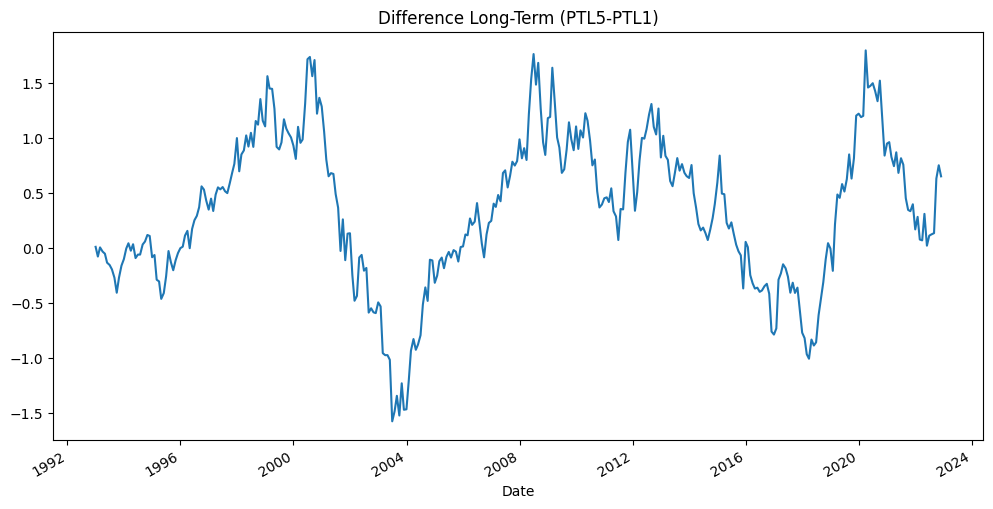

In [32]:
#Plotting the long-term difference
bvw_difference_lt.plot(figsize=(12,6), xlabel = 'Date', title = 'Difference Long-Term (PTL5-PTL1)')

In [33]:
#Add the RF rate to each of the portfolios dataframe

rf_r = pd.read_csv('Factors_rates.CSV',header=3)
rf_r = rf_r.set_index(returns.index[0:-1])
rf_r['constant'] = 1

portfolio_ret_st = portfolio_ret_st.merge(rf_r['RF'], left_on = portfolio_ret_st.index, right_on = rf_r.index)
portfolio_ret_st = portfolio_ret_st.set_index('key_0')

portfolio_ret_lt = portfolio_ret_lt.merge(rf_r['RF'], left_on = portfolio_ret_lt.index, right_on = rf_r.index)
portfolio_ret_lt = portfolio_ret_lt.set_index('key_0')

In [34]:
portfolio_ret_lt

,P1_ptl,P2_ptl,P3_ptl,P4_ptl,P5_ptl,RF
key_0,,,,,,
1990-01-31,0.000000,0.000000,0.000000,0.000000,0.000000,0.57
1990-02-28,0.000000,0.000000,0.000000,0.000000,0.000000,0.57
1990-03-30,0.000000,0.000000,0.000000,0.000000,0.000000,0.64
1990-04-30,0.000000,0.000000,0.000000,0.000000,0.000000,0.69
1990-05-31,0.000000,0.000000,0.000000,0.000000,0.000000,0.68
...,...,...,...,...,...,...
2022-07-29,3.633333,4.500000,3.916667,4.750000,7.216667,0.08
2022-08-31,-6.966667,-3.566667,-1.383333,-1.916667,0.750000,0.19
2022-09-30,-13.566667,-10.016667,-10.433333,-6.966667,-4.783333,0.19


## **Calculating excess returns**

**Short-term**

In [35]:
portfolio_exc_ret_st = portfolio_ret_st.copy()

names_2 = portfolio_lt.columns.values
names_2

for column in names_2:
    portfolio_exc_ret_st[column] = portfolio_ret_st[column] - portfolio_ret_st['RF']

#adding a 0 value for the rows before the first portfolio is built

portfolio_exc_ret_st.iloc[:PS_st,:PT] = 0


In [36]:
portfolio_exc_ret_st.tail()

,P1_ptl,P2_ptl,P3_ptl,P4_ptl,P5_ptl,RF
key_0,,,,,,
2022-07-29,8.153333,4.153333,3.270000,4.520000,3.520000,0.08
2022-08-31,-5.273333,-4.490000,-4.106667,4.160000,-4.323333,0.19
2022-09-30,-11.156667,-9.823333,-13.106667,-6.073333,-6.556667,0.19
2022-10-31,6.370000,12.520000,4.736667,14.553333,20.753333,0.23
2022-11-30,1.093333,3.976667,4.743333,4.860000,1.543333,0.29


**Long-term**

In [37]:
portfolio_exc_ret_lt = portfolio_ret_lt.copy()

names_2 = portfolio_lt.columns.values
names_2

for column in names_2:
    portfolio_exc_ret_lt[column] = portfolio_ret_lt[column] - portfolio_ret_lt['RF']


#adding a 0 value for the rows before the first portfolio is built

portfolio_exc_ret_lt.iloc[:PS_lt,:PT] = 0

In [38]:
portfolio_exc_ret_lt.tail()

,P1_ptl,P2_ptl,P3_ptl,P4_ptl,P5_ptl,RF
key_0,,,,,,
2022-07-29,3.553333,4.420000,3.836667,4.670000,7.136667,0.08
2022-08-31,-7.156667,-3.756667,-1.573333,-2.106667,0.560000,0.19
2022-09-30,-13.756667,-10.206667,-10.623333,-7.156667,-4.973333,0.19
2022-10-31,3.303333,14.653333,12.536667,18.070000,10.370000,0.23
2022-11-30,4.960000,5.060000,0.310000,-0.590000,6.476667,0.29


**Average monthly excess return of each portfolio**

In [39]:
avg_ret = pd.DataFrame({
    'Short-Term' :  portfolio_exc_ret_st.iloc[:,:PT].mean().round(3),
    'Long-Term' : portfolio_exc_ret_lt.iloc[:,:PT].mean().round(3)
})

avg_ret

,Short-Term,Long-Term
P1_ptl,0.670,0.564
P2_ptl,0.643,0.731
P3_ptl,0.664,0.778
P4_ptl,0.923,0.815
P5_ptl,1.139,0.926


In [40]:
#Adjusting the portfolios excess returns dataframe
portfolio_exc_ret_st = portfolio_exc_ret_st.merge(rf_r[['Mkt-RF']], left_on = portfolio_ret_st.index, right_on = rf_r.index)
portfolio_exc_ret_st['constant'] = 1
portfolio_exc_ret_st = portfolio_exc_ret_st.set_index('key_0')

portfolio_exc_ret_lt = portfolio_exc_ret_lt.merge(rf_r[['Mkt-RF']], left_on = portfolio_ret_lt.index, right_on = rf_r.index)
portfolio_exc_ret_lt['constant'] = 1
portfolio_exc_ret_lt = portfolio_exc_ret_lt.set_index('key_0')

## **CAPM**

**Short-term**

In [41]:
#For the entire portfolios

### adjusted_r_squared, beta, alpha, pvalues, average excess return

r2 = []
beta = []
alpha = []
p_value_alpha = []
p_value_market = []
returns_avg = []


for column in portfolio_exc_ret_st:
    jalpha = lm.OLS(portfolio_exc_ret_st[column], portfolio_exc_ret_st[['constant', 'Mkt-RF']], hasconst=bool).fit()
    r2.append(round(jalpha.rsquared_adj, 3))
    alpha.append(round(jalpha.params[0],3))
    beta.append(round(jalpha.params[1],3))
    p_value_alpha.append(round(jalpha.pvalues[0], 3))
    p_value_market.append(round(jalpha.pvalues[1], 3))
    returns_avg.append(round(portfolio_exc_ret_st.mean()[column],3))


capm_st = pd.DataFrame({
    'return' : returns_avg,
    'alpha' : alpha,
    'pvalues Alpha' : p_value_alpha,
    'beta Market' : beta,
    'pvalues Market' : p_value_market,  
    'r2' : r2,
})

capm_st = capm_st.iloc[:-3,:]
capm_st.set_index(names_2[0:5])

d:\Gustavo\FEP\Erasmus\Inv_theory\Final Project\.venv\lib\site-packages\statsmodels\regression\linear_model.py:1752: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


,return,alpha,pvalues Alpha,beta Market,pvalues Market,r2
P1_ptl,0.670,-0.084,0.735,1.093,0.0,0.496
P2_ptl,0.643,-0.017,0.930,0.956,0.0,0.551
P3_ptl,0.664,0.117,0.480,0.793,0.0,0.542
P4_ptl,0.923,0.371,0.020,0.799,0.0,0.565
P5_ptl,1.139,0.520,0.007,0.896,0.0,0.525


In [42]:
CAPM_sml_st = pd.DataFrame({
    'r_ret': capm_st['return'],
    'm_beta': capm_st['beta Market'],
    'constant': 1
})
CAPM_sml_st

,r_ret,m_beta,constant
0,0.670,1.093,1
1,0.643,0.956,1
2,0.664,0.793,1
3,0.923,0.799,1
4,1.139,0.896,1


In [43]:
CAPM_sml_mod_st = lm.OLS(CAPM_sml_st['r_ret'], CAPM_sml_st[['m_beta', 'constant']], hasconst=bool).fit()
CAPM_summary_st = pd.DataFrame({
    'coeff': round(CAPM_sml_mod_st.params,3),
    'pvalue': round(CAPM_sml_mod_st.pvalues,3)
})
CAPM_summary_st

,coeff,pvalue
m_beta,-0.541,0.614
constant,1.298,0.237


In [44]:
#Geting the Rsquared ajd value
round(CAPM_sml_mod_st.rsquared_adj, 3)

-0.206

**Long-term**

In [45]:
#For the entire portfolios

### adjusted_r_squared, beta, alpha, pvalues, average excess return

r2 = []
beta = []
alpha = []
p_value_alpha = []
p_value_market = []
returns_avg = []


for column in portfolio_exc_ret_lt:
    jalpha = lm.OLS(portfolio_exc_ret_lt[column], portfolio_exc_ret_lt[['constant', 'Mkt-RF']], hasconst=bool).fit()
    r2.append(round(jalpha.rsquared_adj, 3))
    alpha.append(round(jalpha.params[0],3))
    beta.append(round(jalpha.params[1],3))
    p_value_alpha.append(round(jalpha.pvalues[0], 3))
    p_value_market.append(round(jalpha.pvalues[1], 3))
    returns_avg.append(portfolio_exc_ret_lt.mean()[column])


capm_lt = pd.DataFrame({
    'return' : returns_avg,
    'alpha' : alpha,
    'pvalues Alpha' : p_value_alpha,
    'beta Market' : beta,
    'pvalues Market' : p_value_market,  
    'r2' : r2,
})

capm_lt = capm_lt.iloc[:-3,:]
### alpha, beta and r2adj for all the portfolios
capm_lt.set_index(names_2[0:5])

d:\Gustavo\FEP\Erasmus\Inv_theory\Final Project\.venv\lib\site-packages\statsmodels\regression\linear_model.py:1752: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


,return,alpha,pvalues Alpha,beta Market,pvalues Market,r2
P1_ptl,0.564194,-0.066,0.762,0.913,0.0,0.473
P2_ptl,0.731409,0.204,0.221,0.764,0.0,0.518
P3_ptl,0.777949,0.205,0.292,0.830,0.0,0.482
P4_ptl,0.815165,0.210,0.234,0.876,0.0,0.558
P5_ptl,0.926430,0.368,0.035,0.809,0.0,0.527


In [46]:
CAPM_sml_lt = pd.DataFrame({
    'r_ret': capm_lt['return'],
    'm_beta': capm_lt['beta Market'],
    'constant': 1
})
CAPM_sml_lt

,r_ret,m_beta,constant
0,0.564194,0.913,1
1,0.731409,0.764,1
2,0.777949,0.830,1
3,0.815165,0.876,1
4,0.926430,0.809,1


In [47]:
CAPM_sml_mod_lt = lm.OLS(CAPM_sml_lt['r_ret'], CAPM_sml_lt[['m_beta', 'constant']], hasconst=bool).fit()
CAPM_summary_lt = pd.DataFrame({
    'coeff': round(CAPM_sml_mod_lt.params,3),
    'pvalue': round(CAPM_sml_mod_lt.pvalues,3)
})
CAPM_summary_lt

,coeff,pvalue
m_beta,-1.149,0.388
constant,1.726,0.169


In [48]:
#Geting the Rsquared ajd value
round(CAPM_sml_mod_lt.rsquared_adj, 3)

0.004

## **Fama-French 3-factor**

**Short-term**

In [49]:
#For the entire portfolios

### adjusted_r_squared, beta, alpha, pvalues, average excess return

r2 = []
beta_market = []
beta_smb = []
beta_hml = []
beta_mom = []
alpha = []
p_value_alpha = []
p_value_market = []
p_value_smb = []
p_value_hml = []
returns_avg = []


for column in portfolio_exc_ret_st:
    ff3_ols_st = sm.OLS(portfolio_exc_ret_st[column], sm.add_constant(rf_r[['constant', 'Mkt-RF','SMB','HML']]), hasconst=bool).fit()
    r2.append(round(ff3_ols_st.rsquared_adj, 3))
    alpha.append(round(ff3_ols_st.params[0],3))
    beta_market.append(round(ff3_ols_st.params[1],3))
    beta_smb.append(round(ff3_ols_st.params[2],3))
    beta_hml.append(round(ff3_ols_st.params[3],3))
    p_value_alpha.append(round(ff3_ols_st.pvalues[0], 3))
    p_value_market.append(round(ff3_ols_st.pvalues[1], 3))
    p_value_smb.append(round(ff3_ols_st.pvalues[2], 3))   
    p_value_hml.append(round(ff3_ols_st.pvalues[3], 3))
    returns_avg.append(portfolio_exc_ret_st.mean()[column])


ff3_st = pd.DataFrame({
    'return' : returns_avg,
    'alpha' : alpha,
    'pvalues Alpha' : p_value_alpha,
    'beta Market' : beta_market,
    'pvalues Market' : p_value_market,
    'beta SMB' : beta_smb,
    'pvalues SMB' : p_value_smb,
    'beta HML' : beta_hml,
    'pvalues HML' : p_value_hml,
    'r2' : r2
})

ff3_st = ff3_st.iloc[:-3,:]
### alpha, beta and r2adj for all the portfolios
ff3_st.set_index(names_2[0:5])

d:\Gustavo\FEP\Erasmus\Inv_theory\Final Project\.venv\lib\site-packages\statsmodels\regression\linear_model.py:1752: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


,return,alpha,pvalues Alpha,beta Market,pvalues Market,beta SMB,pvalues SMB,beta HML,pvalues HML,r2
P1_ptl,0.669932,-0.237,0.293,1.147,0.0,0.001,0.994,0.670,0.0,0.593
P2_ptl,0.642844,-0.152,0.371,0.994,0.0,0.069,0.219,0.599,0.0,0.661
P3_ptl,0.664025,0.049,0.753,0.850,0.0,-0.199,0.000,0.285,0.0,0.603
P4_ptl,0.922886,0.284,0.053,0.832,0.0,-0.009,0.853,0.385,0.0,0.633
P5_ptl,1.138582,0.432,0.019,0.926,0.0,0.010,0.874,0.386,0.0,0.574


In [50]:
ff3_sml_st = pd.DataFrame({
    'r_ret': ff3_st['return'],
    'm_beta': ff3_st['beta Market'],
    'smb_beta' : ff3_st['beta SMB'],
    'hml_beta': ff3_st['beta HML'],
    'constant': 1
})
ff3_sml_st

,r_ret,m_beta,smb_beta,hml_beta,constant
0,0.669932,1.147,0.001,0.670,1
1,0.642844,0.994,0.069,0.599,1
2,0.664025,0.850,-0.199,0.285,1
3,0.922886,0.832,-0.009,0.385,1
4,1.138582,0.926,0.010,0.386,1


In [51]:
ff3_sml_mod_st = sm.OLS(ff3_sml_st['r_ret'], sm.add_constant(ff3_sml_st[['m_beta', 'smb_beta', 'hml_beta', 'constant']]), hasconst=bool).fit()
ff3_summary_st = pd.DataFrame({
    'coeff': round(ff3_sml_mod_st.params,3),
    'pvalue': round(ff3_sml_mod_st.pvalues,3)
})
ff3_summary_st

,coeff,pvalue
m_beta,2.613,0.286
smb_beta,3.099,0.177
hml_beta,-3.785,0.197
constant,0.165,0.853


In [52]:
#Geting the Rsquared ajd value
round(ff3_sml_mod_st.rsquared_adj, 3)

0.752

**Long-term**

In [53]:
#For the entire portfolios

### adjusted_r_squared, beta, alpha, pvalues, average excess return

r2 = []
beta_market = []
beta_smb = []
beta_hml = []
beta_mom = []
alpha = []
p_value_alpha = []
p_value_market = []
p_value_smb = []
p_value_hml = []
returns_avg = []


for column in portfolio_exc_ret_lt:
    ff3_ols_lt = sm.OLS(portfolio_exc_ret_lt[column], sm.add_constant(rf_r[['constant', 'Mkt-RF','SMB','HML']]), hasconst=bool).fit()
    r2.append(round(ff3_ols_lt.rsquared_adj, 3))
    alpha.append(round(ff3_ols_lt.params[0],3))
    beta_market.append(round(ff3_ols_lt.params[1],3))
    beta_smb.append(round(ff3_ols_lt.params[2],3))
    beta_hml.append(round(ff3_ols_lt.params[3],3))
    p_value_alpha.append(round(ff3_ols_lt.pvalues[0], 3))
    p_value_market.append(round(ff3_ols_lt.pvalues[1], 3))
    p_value_smb.append(round(ff3_ols_lt.pvalues[2], 3))   
    p_value_hml.append(round(ff3_ols_lt.pvalues[3], 3))
    returns_avg.append(portfolio_exc_ret_lt.mean()[column])


ff3_lt = pd.DataFrame({
    'return' : returns_avg,
    'alpha' : alpha,
    'pvalues Alpha' : p_value_alpha,
    'beta Market' : beta_market,
    'pvalues Market' : p_value_market,
    'beta SMB' : beta_smb,
    'pvalues SMB' : p_value_smb,
    'beta HML' : beta_hml,
    'pvalues HML' : p_value_hml,
    'r2' : r2
})

ff3_lt = ff3_lt.iloc[:-3,:]
### alpha, beta and r2adj for all the portfolios
ff3_lt.set_index(names_2[0:5])

d:\Gustavo\FEP\Erasmus\Inv_theory\Final Project\.venv\lib\site-packages\statsmodels\regression\linear_model.py:1752: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


,return,alpha,pvalues Alpha,beta Market,pvalues Market,beta SMB,pvalues SMB,beta HML,pvalues HML,r2
P1_ptl,0.564194,-0.222,0.236,0.946,0.0,0.141,0.023,0.698,0.0,0.612
P2_ptl,0.731409,0.070,0.593,0.839,0.0,-0.165,0.000,0.578,0.0,0.703
P3_ptl,0.777949,0.088,0.618,0.874,0.0,-0.011,0.850,0.515,0.0,0.579
P4_ptl,0.815165,0.129,0.432,0.932,0.0,-0.163,0.003,0.346,0.0,0.620
P5_ptl,0.926430,0.304,0.071,0.835,0.0,-0.015,0.793,0.279,0.0,0.559


In [54]:
ff3_sml_lt = pd.DataFrame({
    'r_ret': ff3_lt['return'],
    'm_beta': ff3_lt['beta Market'],
    'smb_beta' : ff3_lt['beta SMB'],
    'hml_beta': ff3_lt['beta HML'],
    'constant': 1
})
ff3_sml_lt

,r_ret,m_beta,smb_beta,hml_beta,constant
0,0.564194,0.946,0.141,0.698,1
1,0.731409,0.839,-0.165,0.578,1
2,0.777949,0.874,-0.011,0.515,1
3,0.815165,0.932,-0.163,0.346,1
4,0.926430,0.835,-0.015,0.279,1


In [55]:
ff3_sml_mod_lt = sm.OLS(ff3_sml_lt['r_ret'], sm.add_constant(ff3_sml_lt[['m_beta', 'smb_beta', 'hml_beta', 'constant']]), hasconst=bool).fit()
ff3_summary_lt = pd.DataFrame({
    'coeff': round(ff3_sml_mod_lt.params,3),
    'pvalue': round(ff3_sml_mod_lt.pvalues,3)
})
ff3_summary_lt

,coeff,pvalue
m_beta,-0.806,0.246
smb_beta,-0.009,0.960
hml_beta,-0.648,0.101
constant,1.789,0.101


In [56]:
#Geting the Rsquared ajd value
round(ff3_sml_mod_lt.rsquared_adj, 3)

0.946

## **Carhart**

**Short-term**

In [57]:
#For the entire portfolios

### adjusted_r_squared, beta, alpha, pvalues, average excess return

r2 = []
beta_market = []
beta_smb = []
beta_hml = []
beta_mom = []
alpha = []
p_value_alpha = []
p_value_market = []
p_value_smb = []
p_value_hml = []
p_value_mom = []
returns_avg = []


for column in portfolio_exc_ret_st:
    carh4_ols_st = sm.OLS(portfolio_exc_ret_st[column], sm.add_constant(rf_r[['constant', 'Mkt-RF','SMB','HML','MOM']]), hasconst=bool).fit()
    r2.append(round(carh4_ols_st.rsquared_adj, 3))
    alpha.append(round(carh4_ols_st.params[0],3))
    beta_market.append(round(carh4_ols_st.params[1],3))
    beta_smb.append(round(carh4_ols_st.params[2],3))
    beta_hml.append(round(carh4_ols_st.params[3],3))
    beta_mom.append(round(carh4_ols_st.params[4],3))
    p_value_alpha.append(round(carh4_ols_st.pvalues[0], 3))
    p_value_market.append(round(carh4_ols_st.pvalues[1], 3))
    p_value_smb.append(round(carh4_ols_st.pvalues[2], 3))   
    p_value_hml.append(round(carh4_ols_st.pvalues[3], 3))
    p_value_mom.append(round(carh4_ols_st.pvalues[4], 3))
    returns_avg.append(portfolio_exc_ret_st.mean()[column])


carh4_st = pd.DataFrame({
    'return' : returns_avg,
    'alpha' : alpha,
    'pvalues Alpha' : p_value_alpha,
    'beta Market' : beta_market,
    'pvalues Market' : p_value_market,
    'beta SMB' : beta_smb,
    'pvalues SMB' : p_value_smb,
    'beta HML' : beta_hml,
    'pvalues HML' : p_value_hml,
    'beta MOM' : beta_mom,
    'pvalues MOM' : p_value_hml,
    'r2' : r2,
})

carh4_st = carh4_st.iloc[:-3,:]
### alpha, beta and r2adj for all the portfolios
carh4_st.set_index(names_2[0:5])

d:\Gustavo\FEP\Erasmus\Inv_theory\Final Project\.venv\lib\site-packages\statsmodels\regression\linear_model.py:1752: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


,return,alpha,pvalues Alpha,beta Market,pvalues Market,beta SMB,pvalues SMB,beta HML,pvalues HML,beta MOM,pvalues MOM,r2
P1_ptl,0.669932,0.098,0.633,1.004,0.0,0.016,0.808,0.516,0.0,-0.433,0.0,0.667
P2_ptl,0.642844,0.014,0.932,0.922,0.0,0.077,0.155,0.523,0.0,-0.215,0.0,0.687
P3_ptl,0.664025,0.107,0.492,0.825,0.0,-0.196,0.000,0.259,0.0,-0.076,0.0,0.607
P4_ptl,0.922886,0.274,0.066,0.836,0.0,-0.009,0.846,0.390,0.0,0.013,0.0,0.632
P5_ptl,1.138582,0.362,0.051,0.956,0.0,0.006,0.917,0.418,0.0,0.091,0.0,0.578


In [58]:
carh4_sml_st = pd.DataFrame({
    'r_ret': carh4_st['return'],
    'm_beta': carh4_st['beta Market'],
    'smb_beta' : carh4_st['beta SMB'],
    'hml_beta': carh4_st['beta HML'],
    'mom_beta' : carh4_st['beta MOM'],
    'constant': 1
})
carh4_sml_st

,r_ret,m_beta,smb_beta,hml_beta,mom_beta,constant
0,0.669932,1.004,0.016,0.516,-0.433,1
1,0.642844,0.922,0.077,0.523,-0.215,1
2,0.664025,0.825,-0.196,0.259,-0.076,1
3,0.922886,0.836,-0.009,0.390,0.013,1
4,1.138582,0.956,0.006,0.418,0.091,1


In [59]:
carh4_sml_mod_st = sm.OLS(carh4_sml_st['r_ret'], sm.add_constant(carh4_sml_st[['m_beta', 'smb_beta', 'hml_beta', 'mom_beta', 'constant']]), hasconst=bool).fit()
carh4_summary_st = pd.DataFrame({
    'coeff': round(carh4_sml_mod_st.params,3),
    'pvalue': round(carh4_sml_mod_st.pvalues,3)
})
carh4_summary_st

,coeff,pvalue
m_beta,4.901,NaN
smb_beta,13.226,NaN
hml_beta,-16.326,NaN
mom_beta,-1.458,NaN
constant,3.331,NaN


In [60]:
#Geting the Rsquared ajd value
round(carh4_sml_mod_st.rsquared_adj, 3)

d:\Gustavo\FEP\Erasmus\Inv_theory\Final Project\.venv\lib\site-packages\statsmodels\regression\linear_model.py:1765: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
d:\Gustavo\FEP\Erasmus\Inv_theory\Final Project\.venv\lib\site-packages\statsmodels\regression\linear_model.py:1765: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)


nan

**Long-term**

In [61]:
#For the entire portfolios

### adjusted_r_squared, beta, alpha, pvalues, average excess return

r2 = []
beta_market = []
beta_smb = []
beta_hml = []
beta_mom = []
alpha = []
p_value_alpha = []
p_value_market = []
p_value_smb = []
p_value_hml = []
p_value_mom = []
returns_avg = []


for column in portfolio_exc_ret_lt:
    carh4_ols_lt = sm.OLS(portfolio_exc_ret_lt[column], sm.add_constant(rf_r[['constant', 'Mkt-RF','SMB','HML','MOM']]), hasconst=bool).fit()
    r2.append(round(carh4_ols_lt.rsquared_adj, 3))
    alpha.append(round(carh4_ols_lt.params[0],3))
    beta_market.append(round(carh4_ols_lt.params[1],3))
    beta_smb.append(round(carh4_ols_lt.params[2],3))
    beta_hml.append(round(carh4_ols_lt.params[3],3))
    beta_mom.append(round(carh4_ols_lt.params[4],3))
    p_value_alpha.append(round(carh4_ols_lt.pvalues[0], 3))
    p_value_market.append(round(carh4_ols_lt.pvalues[1], 3))
    p_value_smb.append(round(carh4_ols_lt.pvalues[2], 3))   
    p_value_hml.append(round(carh4_ols_lt.pvalues[3], 3))
    p_value_mom.append(round(carh4_ols_lt.pvalues[4], 3))
    returns_avg.append(portfolio_exc_ret_lt.mean()[column])


carh4_lt = pd.DataFrame({
    'return' : returns_avg,
    'alpha' : alpha,
    'pvalues Alpha' : p_value_alpha,
    'beta Market' : beta_market,
    'pvalues Market' : p_value_market,
    'beta SMB' : beta_smb,
    'pvalues SMB' : p_value_smb,
    'beta HML' : beta_hml,
    'pvalues HML' : p_value_hml,
    'beta MOM' : beta_mom,
    'pvalues MOM' : p_value_mom,
    'r2' : r2,
})

carh4_lt = carh4_lt.iloc[:-3,:]
### alpha, beta and r2adj for all the portfolios
carh4_lt.set_index(names_2[0:5])

d:\Gustavo\FEP\Erasmus\Inv_theory\Final Project\.venv\lib\site-packages\statsmodels\regression\linear_model.py:1752: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


,return,alpha,pvalues Alpha,beta Market,pvalues Market,beta SMB,pvalues SMB,beta HML,pvalues HML,beta MOM,pvalues MOM,r2
P1_ptl,0.564194,-0.067,0.719,0.880,0.0,0.148,0.014,0.626,0.0,-0.201,0.000,0.633
P2_ptl,0.731409,0.136,0.303,0.811,0.0,-0.162,0.000,0.548,0.0,-0.085,0.004,0.709
P3_ptl,0.777949,0.255,0.139,0.802,0.0,-0.003,0.956,0.438,0.0,-0.216,0.000,0.610
P4_ptl,0.815165,0.193,0.243,0.905,0.0,-0.160,0.003,0.317,0.0,-0.083,0.025,0.624
P5_ptl,0.926430,0.311,0.070,0.832,0.0,-0.014,0.797,0.276,0.0,-0.008,0.827,0.558


In [62]:
carh4_sml_lt = pd.DataFrame({
    'r_ret': carh4_lt['return'],
    'm_beta': carh4_lt['beta Market'],
    'smb_beta' : carh4_lt['beta SMB'],
    'hml_beta': carh4_lt['beta HML'],
    'mom_beta' : carh4_lt['beta MOM'],
    'constant': 1
})
carh4_sml_lt = carh4_sml_lt.set_index(names_2[0:5])
carh4_sml_lt

,r_ret,m_beta,smb_beta,hml_beta,mom_beta,constant
P1_ptl,0.564194,0.880,0.148,0.626,-0.201,1
P2_ptl,0.731409,0.811,-0.162,0.548,-0.085,1
P3_ptl,0.777949,0.802,-0.003,0.438,-0.216,1
P4_ptl,0.815165,0.905,-0.160,0.317,-0.083,1
P5_ptl,0.926430,0.832,-0.014,0.276,-0.008,1


In [63]:
carh4_sml_mod_lt = sm.OLS(carh4_sml_lt['r_ret'], sm.add_constant(carh4_sml_lt[['m_beta', 'smb_beta', 'hml_beta', 'mom_beta', 'constant']]), hasconst=bool).fit()
carh4_summary_lt = pd.DataFrame({
    'coeff': round(carh4_sml_mod_lt.params,3),
    'pvalue': round(carh4_sml_mod_lt.pvalues,3)
})
carh4_summary_lt

,coeff,pvalue
m_beta,-0.925,NaN
smb_beta,-0.047,NaN
hml_beta,-0.737,NaN
mom_beta,0.271,NaN
constant,1.901,NaN


In [64]:
#Geting the Rsquared ajd value
round(carh4_sml_mod_lt.rsquared_adj, 3)

d:\Gustavo\FEP\Erasmus\Inv_theory\Final Project\.venv\lib\site-packages\statsmodels\regression\linear_model.py:1765: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
d:\Gustavo\FEP\Erasmus\Inv_theory\Final Project\.venv\lib\site-packages\statsmodels\regression\linear_model.py:1765: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)


nan

### **Sharpe and Treynor Ratio**

In [65]:
# Sharpe Ratio = (Returns - Risk free rate) / std
# Treynor Ratio = (Returns - Risk free rate) / Beta

st_avg = portfolio_exc_ret_st.mean()
st_std = portfolio_exc_ret_st.std()
lt_avg = portfolio_exc_ret_lt.mean()
lt_std = portfolio_exc_ret_lt.std()


sharpe_st = []
sharpe_lt = []
treynor_st = []
treynor_lt = []


for i in range(0,PT):
    ratio_s_st = st_avg[i]/st_std[i]
    ratio_s_lt = lt_avg[i]/lt_std[i]
    ratio_t_st = st_avg[i]/CAPM_sml_st['m_beta'][i]
    ratio_t_lt = lt_avg[i]/CAPM_sml_lt['m_beta'][i]
    sharpe_st.append(round(ratio_s_st, 2))
    sharpe_lt.append(round(ratio_s_lt, 2))
    treynor_st.append(round(ratio_t_st, 2))
    treynor_lt.append(round(ratio_t_lt, 2))
    
ratios = pd.DataFrame({
    'sharpe_st' : sharpe_st,
    'sharpe_lt' : sharpe_lt,
    'treynor_st' : treynor_st,
    'treynor_lt' : treynor_lt
})

ratios

,sharpe_st,sharpe_lt,treynor_st,treynor_lt
0,0.10,0.10,0.61,0.62
1,0.11,0.16,0.67,0.96
2,0.14,0.15,0.84,0.94
3,0.20,0.16,1.16,0.93
4,0.21,0.19,1.27,1.15


In [66]:
# Sharpe Ratio = (Returns - Risk free rate) / std
# Treynor Ratio = (Returns - Risk free rate) / Beta

st_avg = portfolio_exc_ret_st.mean()
st_std = portfolio_exc_ret_st.std()
lt_avg = portfolio_exc_ret_lt.mean()
lt_std = portfolio_exc_ret_lt.std()


sharpe_st = []
sharpe_lt = []
treynor_st = []
treynor_lt = []


for i in range(0,PT):
    ratio_s_st = st_avg[i]/st_std[i]
    ratio_s_lt = lt_avg[i]/lt_std[i]
    ratio_t_st = st_avg[i]/ff3_sml_st['m_beta'][i]
    ratio_t_lt = lt_avg[i]/ff3_sml_lt['m_beta'][i]
    sharpe_st.append(round(ratio_s_st, 2))
    sharpe_lt.append(round(ratio_s_lt, 2))
    treynor_st.append(round(ratio_t_st, 2))
    treynor_lt.append(round(ratio_t_lt, 2))
    
ratios = pd.DataFrame({
    'sharpe_st' : sharpe_st,
    'sharpe_lt' : sharpe_lt,
    'treynor_st' : treynor_st,
    'treynor_lt' : treynor_lt
})

ratios

,sharpe_st,sharpe_lt,treynor_st,treynor_lt
0,0.10,0.10,0.58,0.60
1,0.11,0.16,0.65,0.87
2,0.14,0.15,0.78,0.89
3,0.20,0.16,1.11,0.87
4,0.21,0.19,1.23,1.11


In [67]:
# Sharpe Ratio = (Returns - Risk free rate) / std
# Treynor Ratio = (Returns - Risk free rate) / Beta

st_avg = portfolio_exc_ret_st.mean()
st_std = portfolio_exc_ret_st.std()
lt_avg = portfolio_exc_ret_lt.mean()
lt_std = portfolio_exc_ret_lt.std()


sharpe_st = []
sharpe_lt = []
treynor_st = []
treynor_lt = []


for i in range(0,PT):
    ratio_s_st = st_avg[i]/st_std[i]
    ratio_s_lt = lt_avg[i]/lt_std[i]
    ratio_t_st = st_avg[i]/carh4_sml_st['m_beta'][i]
    ratio_t_lt = lt_avg[i]/carh4_sml_lt['m_beta'][i]
    sharpe_st.append(round(ratio_s_st, 2))
    sharpe_lt.append(round(ratio_s_lt, 2))
    treynor_st.append(round(ratio_t_st, 2))
    treynor_lt.append(round(ratio_t_lt, 2))
    
ratios = pd.DataFrame({
    'sharpe_st' : sharpe_st,
    'sharpe_lt' : sharpe_lt,
    'treynor_st' : treynor_st,
    'treynor_lt' : treynor_lt
})

ratios

,sharpe_st,sharpe_lt,treynor_st,treynor_lt
0,0.10,0.10,0.67,0.64
1,0.11,0.16,0.70,0.90
2,0.14,0.15,0.80,0.97
3,0.20,0.16,1.10,0.90
4,0.21,0.19,1.19,1.11


### **Expected Returns**

In [68]:
expected_returns = pd.DataFrame({
    
    'CAPM_short' : CAPM_sml_st['m_beta'] * rf_r['Mkt-RF'].mean(),
    'FF3_short' : ff3_sml_st['m_beta'] * rf_r['Mkt-RF'].mean() + ff3_sml_st['smb_beta'] * rf_r['SMB'].mean() + ff3_sml_st['hml_beta'] * rf_r['HML'].mean(),
    'CARHART_short' : carh4_sml_st['m_beta'] * rf_r['Mkt-RF'].mean() + carh4_sml_st['smb_beta'] * rf_r['SMB'].mean() + carh4_sml_st['hml_beta'] * rf_r['HML'].mean() + carh4_sml_st['mom_beta'] * rf_r['MOM'].mean(),

    'CAPM_long' : CAPM_sml_lt['m_beta'] * rf_r['Mkt-RF'].mean(),
    'FF3_long' : ff3_sml_lt['m_beta'] * rf_r['Mkt-RF'].mean() + ff3_sml_lt['smb_beta'] * rf_r['SMB'].mean() + ff3_sml_lt['hml_beta'] * rf_r['HML'].mean(),
    'CARHART_long' : carh4_sml_st['m_beta'] * rf_r['Mkt-RF'].mean() + carh4_sml_st['smb_beta'] * rf_r['SMB'].mean() + carh4_sml_st['hml_beta'] * rf_r['HML'].mean() + carh4_sml_st['mom_beta'] * rf_r['MOM'].mean(),
})
expected_returns

,CAPM_short,FF3_short,CARHART_short,CAPM_long,FF3_long,CARHART_long
0,0.754474,0.906326,0.571489,0.630224,0.786364,0.571489
1,0.659906,0.795382,0.628571,0.527373,0.661401,0.628571
2,0.547391,0.615532,0.557043,0.572931,0.690197,0.557043
3,0.551533,0.639193,0.649153,0.604684,0.686157,0.649153
4,0.618490,0.706150,0.776336,0.558435,0.622553,0.776336


### **Realized Returns**

In [69]:
realized_returns = pd.DataFrame({
    'Realized_short' : portfolio_exc_ret_st.iloc[:,:PT].mean(),
    'Realized_long' : portfolio_exc_ret_lt.iloc[:,:PT].mean()
})
realized_returns

,Realized_short,Realized_long
P1_ptl,0.669932,0.564194
P2_ptl,0.642844,0.731409
P3_ptl,0.664025,0.777949
P4_ptl,0.922886,0.815165
P5_ptl,1.138582,0.926430


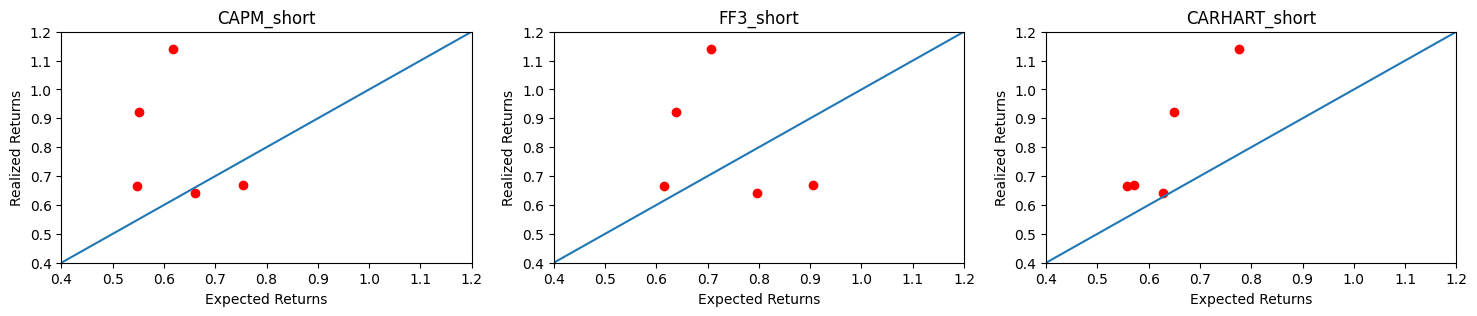

In [70]:
#Ploting Expected Returns of the short-term portfolio for each Model

fig = plt.figure(figsize=(18,3))

graph1 = fig.add_subplot(131)
graph1.set_title('CAPM_short')
graph1.plot(expected_returns['CAPM_short'], realized_returns['Realized_short'], 'o', color='red',)
graph1.axline((1,1),slope=1)
graph1.set(xlim=(0.4, 1.2), ylim=(0.4, 1.2))
graph1.set_xlabel('Expected Returns')
graph1.set_ylabel('Realized Returns')


graph2 = fig.add_subplot(133)
graph2.set_title('CARHART_short')
graph2.plot(expected_returns['CARHART_short'], realized_returns['Realized_short'], 'o', color='red')
graph2.axline((1,1),slope=1)
graph2.set(xlim=(0.4, 1.2), ylim=(0.4, 1.2))
graph2.set_xlabel('Expected Returns')
graph2.set_ylabel('Realized Returns')

graph3 = fig.add_subplot(132)
graph3.set_title('FF3_short')
graph3.plot(expected_returns['FF3_short'], realized_returns['Realized_short'], 'o', color='red')
graph3.axline((1,1),slope=1)
graph3.set(xlim=(0.4, 1.2), ylim=(0.4, 1.2))
graph3.set_xlabel('Expected Returns')
graph3.set_ylabel('Realized Returns')

plt.show()


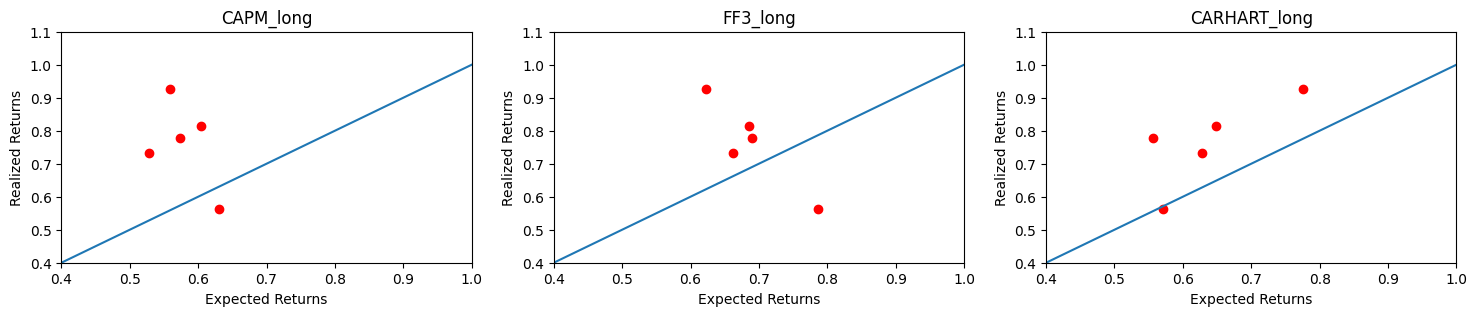

In [71]:
#Ploting Expected Returns of the long-term portfolio for each Model

fig = plt.figure(figsize=(18,3))

graph1 = fig.add_subplot(131)
graph1.set_title('CAPM_long')
graph1.plot(expected_returns['CAPM_long'], realized_returns['Realized_long'], 'o', color='red',)
graph1.axline((1,1),slope=1)
graph1.set(xlim=(0.4, 1), ylim=(0.4, 1.1))
graph1.set_xlabel('Expected Returns')
graph1.set_ylabel('Realized Returns')


graph2 = fig.add_subplot(133)
graph2.set_title('CARHART_long')
graph2.plot(expected_returns['CARHART_long'], realized_returns['Realized_long'], 'o', color='red')
graph2.axline((1,1),slope=1)
graph2.set(xlim=(0.4, 1), ylim=(0.4, 1.1))
graph2.set_xlabel('Expected Returns')
graph2.set_ylabel('Realized Returns')

graph3 = fig.add_subplot(132)
graph3.set_title('FF3_long')
graph3.plot(expected_returns['FF3_long'], realized_returns['Realized_long'], 'o', color='red')
graph3.axline((1,1),slope=1)
graph3.set(xlim=(0.4, 1), ylim=(0.4, 1.1))
graph3.set_xlabel('Expected Returns')
graph3.set_ylabel('Realized Returns')

plt.show()